In [1]:
# Data Preparation
import numpy as np
import pandas as pd
import random

# Modeling
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Visualisation
from matplotlib import pyplot as plt
from plotnine import *
# theme adaptation for x, y-labels
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Data Preparation

In [2]:
num_points = 10
x = random.sample(population=set(np.linspace(start=0, stop=10, num=num_points)), k=num_points)
y = random.sample(population=set(np.linspace(start=0, stop=10, num=num_points)), k=num_points)
labels = range(1, num_points+1)
df = pd.DataFrame(list(zip(x, y, labels)), columns=['x', 'y', 'point_labels'])


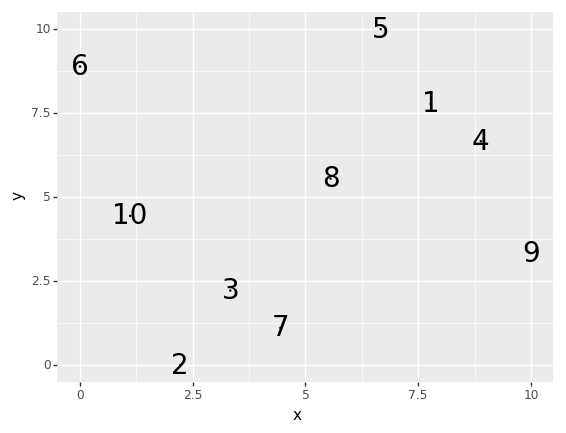

<ggplot: (-9223371952762997090)>

In [3]:
(ggplot(data=df)
  + aes(x='x', y='y', label='point_labels')
  + geom_point(size=0)
  + geom_text(size=20)
)

# Modeling

In [4]:
X = np.array(df[['x', 'y']])
X

array([[ 7.77777778,  7.77777778],
       [ 2.22222222,  0.        ],
       [ 3.33333333,  2.22222222],
       [ 8.88888889,  6.66666667],
       [ 6.66666667, 10.        ],
       [ 0.        ,  8.88888889],
       [ 4.44444444,  1.11111111],
       [ 5.55555556,  5.55555556],
       [10.        ,  3.33333333],
       [ 1.11111111,  4.44444444]])

In [5]:
linked = linkage(X, 'single')

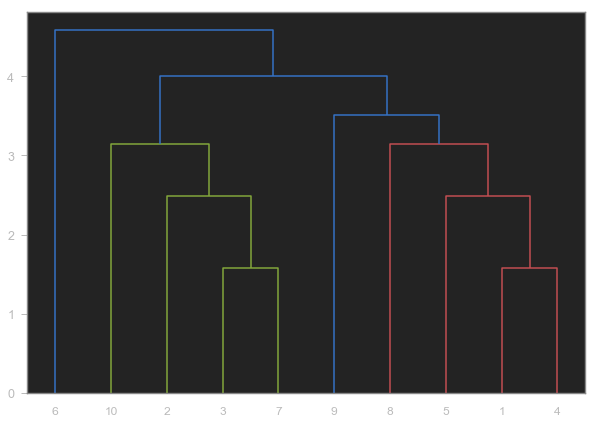

In [6]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [7]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 2, 2, 0, 0, 1, 2, 0, 0, 1], dtype=int64)

In [8]:
df['class_labels'] = cluster.labels_  # assign the result to a new column

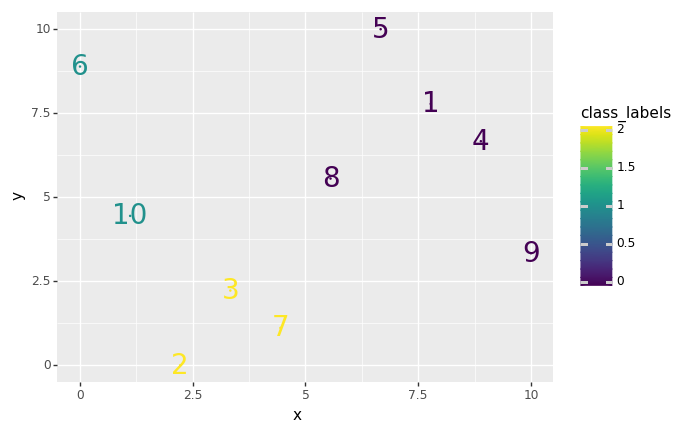

<ggplot: (-9223371952762450358)>

In [9]:
(ggplot(data=df)
  + aes(x='x', y='y', color='class_labels', label='point_labels') 
  + geom_point(size = 0)
  + geom_text(size=20)
)